In [6]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [7]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [8]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [10]:
df = pd.read_csv("resources/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
selected_features = df.drop("koi_disposition", axis = 1)
selected_features.head(5)

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
data = selected_features
target = df["koi_disposition"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)



In [7]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Train the Model



In [9]:
#Review possible important features with Decision Tree

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)

In [10]:
print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8483981693363845


In [11]:
labels = data.columns
clf_importances = clf.feature_importances_
clf_importances_array = zip(clf_importances, labels)
sorted(clf_importances_array, reverse=True)[:10]


[(0.19498480426684972, 'koi_fpflag_nt'),
 (0.18322372199330475, 'koi_fpflag_co'),
 (0.1733182396202466, 'koi_fpflag_ss'),
 (0.13388952480981978, 'koi_model_snr'),
 (0.030401445013682398, 'koi_fpflag_ec'),
 (0.024411443342200224, 'koi_impact'),
 (0.017474057135709358, 'dec'),
 (0.014652172669042998, 'koi_prad'),
 (0.012801258899051034, 'koi_time0bk'),
 (0.01196278903207763, 'koi_srad_err1')]

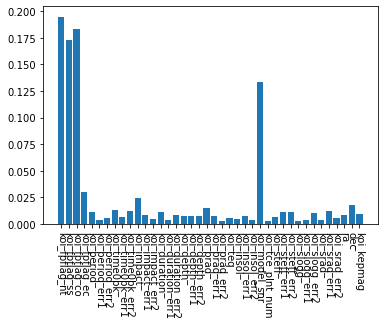

In [12]:

from matplotlib import pyplot
# Plot feature importance from Decision Tree

pyplot.bar([x for x in labels], clf_importances)
pyplot.xticks(rotation = -90)
pyplot.show()


In [13]:
# Review possible important features with KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [14]:
from sklearn.inspection import permutation_importance
results = permutation_importance(knn, X_train_scaled, y_train, scoring='accuracy')
knn_importances = results.importances_mean

In [16]:
knn_importances_array = zip(knn_importances, labels)
sorted(knn_importances_array, reverse=True)[:10]


[(0.2056456227350753, 'koi_fpflag_ss'),
 (0.1551020408163265, 'koi_fpflag_nt'),
 (0.12229639519359148, 'koi_fpflag_co'),
 (0.05725729544154108, 'koi_fpflag_ec'),
 (0.04455464428762157, 'dec'),
 (0.03879458325386227, 'ra'),
 (0.02098035475872593, 'koi_kepmag'),
 (0.020141140568376882, 'koi_period'),
 (0.01758535189776842, 'koi_slogg_err2'),
 (0.01605950791531563, 'koi_tce_plnt_num')]

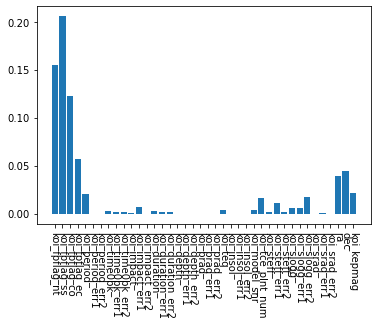

In [17]:
# plot feature importance from KNN
pyplot.bar([x for x in labels], knn_importances)
pyplot.xticks(rotation = -90)
pyplot.show()


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train_scaled, y_train)

In [18]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.8777417509059698
Testing Data Score: 0.8197940503432495


Decision Tree Prominent Features:<br>
 (0.19498480426684972, 'koi_fpflag_nt'),<br>
 (0.18322372199330475, 'koi_fpflag_co'),<br>
 (0.1733182396202466, 'koi_fpflag_ss'),<br>
 (0.13388952480981978, 'koi_model_snr')

KNN Prominent Features:<br>
 (0.2056456227350753, 'koi_fpflag_ss'),<br>
 (0.1551020408163265, 'koi_fpflag_nt'),<br>
 (0.12229639519359148, 'koi_fpflag_co')

Features to use for final models:<br>
koi_fpflag_nt<br>
koi_fpflag_co<br>
koi_fpflag_ss<br>
koi_model_snr